<a href="https://colab.research.google.com/github/RonSK03/EMNIST/blob/main/EMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')  #connecting google drive to access data

Mounted at /content/drive/


In [ ]:
file_path='/content/drive/MyDrive/EMNIST/emnist-balanced-train.csv'

In [ ]:
file_test='/content/drive/MyDrive/EMNIST/emnist-balanced-test.csv'

In [ ]:
import numpy as np
import pandas as pd
import torch.nn as nn
import torch
import torchvision
import matplotlib.pyplot as plt
#importing libraries

In [ ]:
import torch.optim as opt

In [ ]:
from torchvision import datasets, transforms
import torch.nn.functional as F

In [ ]:
test_data=pd.read_csv(file_test)
test_data.head(5) #calling data and viewing first 5 rows

,41,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.523,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532
0,39,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,44,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:

training_data=pd.read_csv(file_path)
training_data.head(5)

,45,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532,0.533
0,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,42,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_image=training_data.iloc[:,1:]
train_image.head() #removing label column to get just pixel values in row

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532,0.533
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_image=test_data.iloc[:,1:]
test_image.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.523,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
labels_train=training_data.iloc[:,0]
labels_train.head()#accessing only labels

,45
0,36
1,43
2,15
3,4
4,42


In [ ]:
labels_test=test_data.iloc[:,0]
labels_test.head()

,41
0,39
1,9
2,26
3,44
4,33


In [ ]:
type(labels_train)

pandas.core.series.Series

In [ ]:
type(test_image)

torch.Tensor

In [ ]:
train_image=torch.tensor(train_image.values, dtype=torch.float)/255
labels_train=torch.tensor(labels_train.values, dtype=torch.long) #converting to tensor and normalizing

In [ ]:
test_image=torch.tensor(test_image.values, dtype=torch.float)/255
labels_test=torch.tensor(labels_test.values, dtype=torch.long) #converting to tensor and normalizing

In [ ]:
train_dataset=TensorDataset(train_image, labels_train)
test_dataset=TensorDataset(test_image, labels_test) #creating dataset to put in Dataloader to make batches to train/test

In [ ]:
train_loaded=DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loaded=DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.hlayer1=nn.Linear(784, 16)
    self.hlayerL1=nn.Linear(16,8)
    self.hlayerL2=nn.Linear(8,8)
    self.hlayerskip=nn.Linear(8, 8)
    self.hlayerR1=nn.Linear(16, 12)
    self.hlayerR2=nn.Linear(12, 8)
    self.concatenate=nn.Linear(16, 16)
    self.output=nn.Linear(16,47)

  def forward(self, x):
    x=F.relu(self.hlayer1(x))

    #left side
    x1=self.hlayerL1(x)
    x2=self.hlayerL2(x1)

    xL= x1+x2
    xL=self.hlayerskip(xL)

    #right side
    x=self.hlayerR1(x)
    x=self.hlayerR2(x)

    #net
    x=torch.cat((x,xL), dim=1)
    x=self.concatenate(x)
    x=self.output(x)

    return x


#using relu activation and added all layers and the forward propagation

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Net().to(device) #sending model to GPU for faster processing

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-5) #using CrossEnropyLoss cost function to calculate the loss and optimizer AdamW which performs the gradient descent


In [ ]:

train_loss=[]
test_loss=[]
epochacc=[]

for epochs in range(30):
    model.train() #setting model mode to train
    net_test_loss=0
    net_loss=0
    with torch.set_grad_enabled(True):
        for inputs, labels in train_loaded:
          inputs=inputs.to(device)
          inputs = inputs.view(inputs.size(0), -1)
          labels=labels.to(device) #sending the inputs and labels to GPU
          optimizer.zero_grad() #makes the gradients of all weights 0 before next iteration
          outputs=model(inputs)
          _, preds=torch.max(outputs,1) #outputs returns a tensor of scores of all possibilities so we take the one with highest score
          loss=criterion(outputs, labels)
          loss.backward()#calulates loss and backpropagates
          optimizer.step()
          net_loss=net_loss+loss.item()
    avg_loss=net_loss/len(train_loaded)
    train_loss.append(avg_loss)
    model.eval() #sets model mode to evaluation/testin
    with torch.set_grad_enabled(False):
     running_corrects=0
     for inputs, labels in test_loaded:
        inputs=inputs.to(device)
        inputs = inputs.view(inputs.size(0), -1)
        labels=labels.to(device)
        outputs=model(inputs)
        _, preds=torch.max(outputs, 1)
        loss=criterion(outputs, labels)
        running_corrects += torch.sum(preds == labels.data)
        net_test_loss=net_test_loss+loss.item()
     avg_test=net_test_loss/len(test_loaded)
    test_loss.append(avg_test)
    epoch_acc = running_corrects.double() /len(test_loaded.dataset)
    epochacc.append(epoch_acc.item())
    print(f"Accuracy={epoch_acc}")


print("Test complete")
torch.save(model.state_dict(), "/content/drive/MyDrive/neural_emnist_model.pth")
 #model training and testing for 30 iterations. saving model as above name


Accuracy=0.6021596893451779
Accuracy=0.6326932283632108
Accuracy=0.657056226395021
Accuracy=0.6632799617000904
Accuracy=0.6693973083674664
Accuracy=0.6788658971221874
Accuracy=0.6812064471514442
Accuracy=0.6821107505718389
Accuracy=0.6845044949199426
Accuracy=0.6855683812968775
Accuracy=0.6834938028618543
Accuracy=0.6891855949784563
Accuracy=0.6883876801957551
Accuracy=0.6867918506303526
Accuracy=0.6863131017607319
Accuracy=0.6888132347465291
Accuracy=0.6893983722538433
Accuracy=0.6923772541092611
Accuracy=0.6915793393265599
Accuracy=0.6924836427469546
Accuracy=0.6920580881961806
Accuracy=0.6921112825150274
Accuracy=0.6920580881961806
Accuracy=0.6943454439065908
Accuracy=0.6939198893558168
Accuracy=0.6913133677323262
Accuracy=0.6912601734134795
Accuracy=0.6930687802542689
Accuracy=0.6928028086600351
Accuracy=0.6925900313846481
Test complete


In [ ]:
model=Net()
model.load_state_dict(torch.load("/content/drive/MyDrive/neural_emnist_model.pth"))
#loading saved model from path


<All keys matched successfully>

In [ ]:
predictions=[]
model=model.to(device)
model.eval()
with torch.set_grad_enabled(False):
  for inputs, labels in test_loaded:
        inputs=inputs.to(device)
        inputs = inputs.view(inputs.size(0), -1)
        labels=labels.to(device)
        outputs=model(inputs)
        _, preds=torch.max(outputs, 1)
        print("prediction is ", preds)
        predictions.extend(preds.cpu().numpy()) #creating a list predictions with all the predictions
df = pd.DataFrame(predictions, columns=["label"]) #converting the list to a dataframe and adding the top row of label and id
df["id"] = df.index
df = df[["id", "label"]]
df.to_csv("submission_new_.csv", index=False) #saving dataframe to csv

prediction is  tensor([39,  9, 26,  9, 33, 14, 10,  3, 21, 16,  7,  2, 16, 16, 27,  6, 44, 28,
        18, 29,  8,  4, 35, 39, 15, 39, 33, 37, 15, 12, 21, 28],
       device='cuda:0')
prediction is  tensor([15, 43, 12, 20, 26, 12,  1, 37, 37, 44, 23,  3,  5, 26, 25,  1, 20, 16,
        31, 26, 21,  2, 17,  9, 28, 34, 35,  0, 39, 33, 26, 33],
       device='cuda:0')
prediction is  tensor([ 2,  3, 44, 18, 36, 38, 26, 28,  6, 39, 22, 40, 45,  3, 21, 25, 17, 28,
        33, 12, 32, 31, 11, 13, 40, 29, 12, 32, 26, 13,  1, 12],
       device='cuda:0')
prediction is  tensor([ 9,  5, 42, 17, 38, 34, 26, 19, 35, 24, 11, 10, 10, 45, 40, 34, 30, 27,
        37,  4, 25,  8,  8,  0,  4,  3, 38, 10,  1, 26, 38, 20],
       device='cuda:0')
prediction is  tensor([39, 25, 38,  7, 11, 38,  5, 26, 42, 40, 13, 10, 33, 12, 29, 25, 37,  2,
        26, 12, 19,  9, 12, 10, 43,  7, 34, 14, 40, 23, 33, 15],
       device='cuda:0')
prediction is  tensor([32, 34, 44,  5, 22,  4, 20, 30, 21,  3, 35,  6, 33, 46, 1

In [ ]:
import shutil
sub_path = '/content/drive/My Drive/submission_new_.csv'
shutil.copyfile('submission_new_.csv', sub_path)


'/content/drive/My Drive/submission_new_.csv'

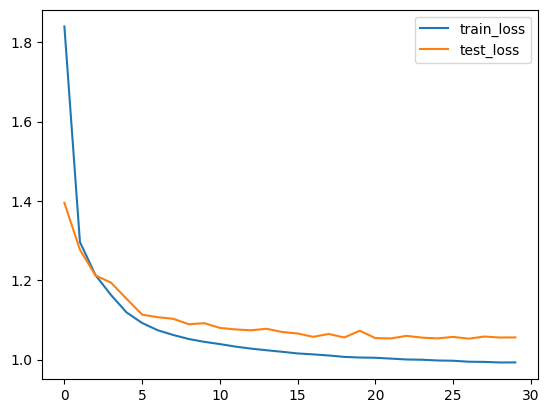

In [ ]:
plt.plot(train_loss, label="train_loss")
plt.plot(test_loss, label="test_loss")
plt.legend()
plt.show() #plotting the training loss and test loss to see if learning rate was chosen well

In [ ]:
import pickle


In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.hlayer1=nn.Linear(784, 16)
    self.hlayerL1=nn.Linear(16,8)
    self.hlayerL2=nn.Linear(8,8)
    self.hlayerskip=nn.Linear(8, 8)
    self.hlayerR1=nn.Linear(16, 12)
    self.hlayerR2=nn.Linear(12, 8)
    self.concatenate=nn.Linear(16, 16)
    self.output=nn.Linear(16,47)

  def forward(self, x):
    x=F.relu(self.hlayer1(x))

    #left side
    x1=self.hlayerL1(x)
    x2=self.hlayerL2(x1)

    xL= x1+x2
    xL=self.hlayerskip(xL)

    #right side
    x=self.hlayerR1(x)
    x=self.hlayerR2(x)

    #net
    x=torch.cat((x,xL), dim=1)
    x=self.concatenate(x)
    x=self.output(x)

    return x
#defining architecture again to reload model

In [ ]:
model=Net()
model.load_state_dict(torch.load("/content/drive/MyDrive/neural_emnist_model.pth"))
model.eval

<bound method Module.eval of Net(
  (hlayer1): Linear(in_features=784, out_features=16, bias=True)
  (hlayerL1): Linear(in_features=16, out_features=8, bias=True)
  (hlayerL2): Linear(in_features=8, out_features=8, bias=True)
  (hlayerskip): Linear(in_features=8, out_features=8, bias=True)
  (hlayerR1): Linear(in_features=16, out_features=12, bias=True)
  (hlayerR2): Linear(in_features=12, out_features=8, bias=True)
  (concatenate): Linear(in_features=16, out_features=16, bias=True)
  (output): Linear(in_features=16, out_features=47, bias=True)
)>

In [ ]:
model_weights=model.state_dict()
with open("model_weights.pkl","wb") as f:
  pickle.dump(model_weights, f)

In [ ]:
image = train_image[0] #choosing a random image from training dataset to see model working
image

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
with torch.no_grad():
    image = image.to(device)
    model = model.to(device)
    image = image.view(1, -1)
    output = model(image)
    _, preds = torch.max(output, 1)
print("Prediction is", preds.item())
#printing prediction for that image

Prediction is 41
